### Kaggle Link: [Click here](https://www.kaggle.com/code/nyinyeinaung/blood-pressure-category-classification-using-ann)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,average_precision_score

In [2]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease/cardio_data_processed.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


* ID: Unique identifier for each patient.
* age: Age of the patient in days.
* age_years: Age of the patient in years (derived from age).
* gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
* height: Height of the patient in centimeters.
* weight: Weight of the patient in kilograms.
* ap_hi: Systolic blood pressure.
* ap_lo: Diastolic blood pressure.
* cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
* gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
* smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
* alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
* active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
* cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
* bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
* bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
* bp_category_encoded: Encoded form of bp_category for machine learning purposes.

In [3]:
#check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [4]:
#check for missing data
df.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [5]:
#check for duplicated entries
df.duplicated().sum()

0

# Simple EDA

Text(0, 0.5, 'Number of patients')

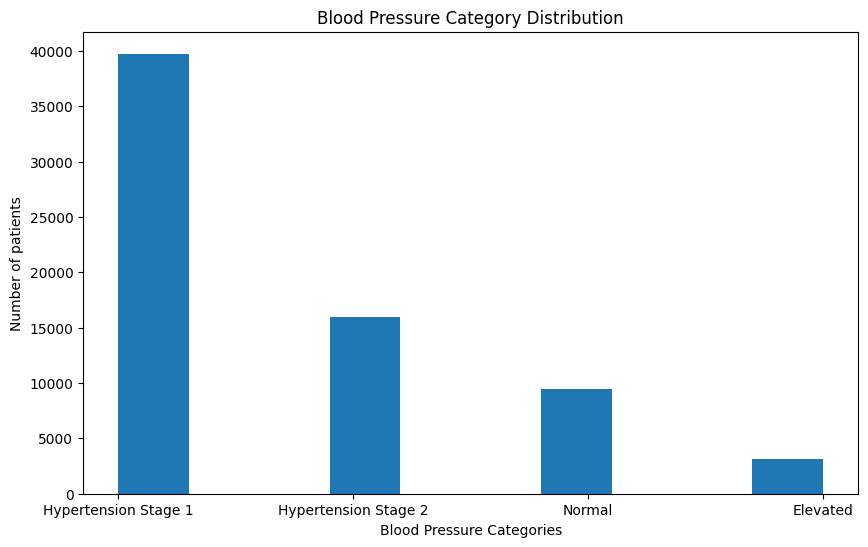

In [6]:
#Check category distribution
plt.figure(figsize=(10,6))
df['bp_category'].hist(grid=False)
plt.title('Blood Pressure Category Distribution')
plt.xlabel('Blood Pressure Categories')
plt.ylabel('Number of patients')

Text(0, 0.5, 'Number of patients')

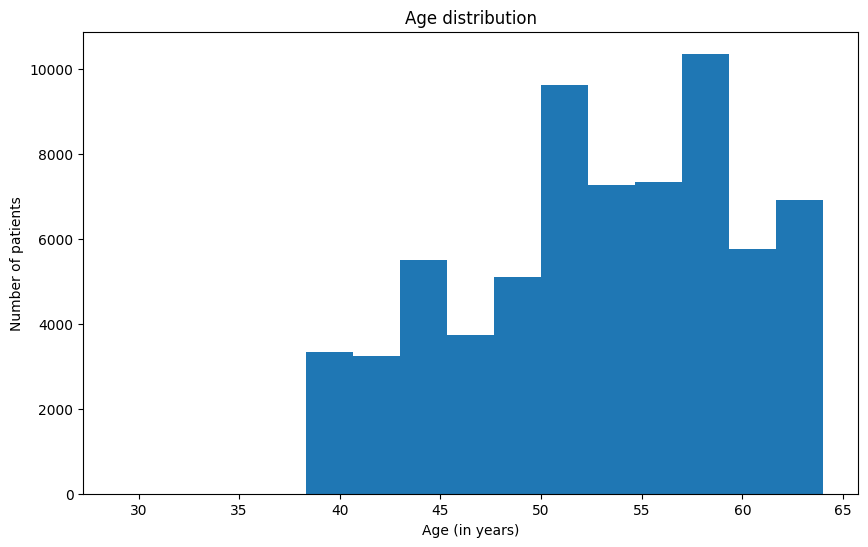

In [7]:
#check age distribution
plt.figure(figsize=(10,6))
df['age_years'].hist(grid=False,bins=15)
plt.title("Age distribution")
plt.xlabel('Age (in years)')
plt.ylabel('Number of patients')

([<matplotlib.axis.XTick at 0x79db0c948670>,
 [Text(1.05, 0, 'Female'), Text(1.95, 0, 'Male')])

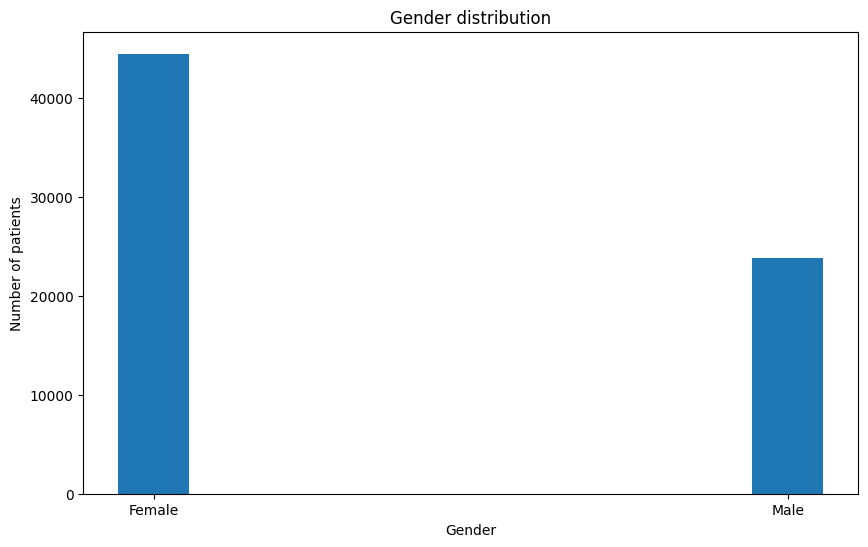

In [8]:
#check height distribution
plt.figure(figsize=(10,6))
df['gender'].hist(grid=False)
plt.title("Gender distribution")
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.xticks([1.05,1.95],['Female','Male']) #manually set ticks for gender

# Data Preprocessing



In [9]:
#drop the bp_category_encoded or bp_category
df =df.drop('bp_category',axis=1)
#drop the id column
df = df.drop('id',axis=1)

In [10]:
#Apply ordinal encoder to labels to prep for ANN
bp_categories = ['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']
enc = OrdinalEncoder()
df['bp_category_encoded']=enc.fit_transform(df[['bp_category_encoded']])

#Turn the encoded labels into integers
df['bp_category_encoded']=df['bp_category_encoded'].apply(lambda x: int(x))

In [11]:
#Split features and label
X = df.drop('bp_category_encoded',axis=1)
y = df['bp_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((54564, 14), (13641, 14), (54564,), (13641,))

In [12]:
#Apply the minmax scaler to the data for normalization
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Making ANN Model

In [13]:
#Set random seed
tf.random.set_seed(42)

#create model
model = Sequential([
    InputLayer(input_shape=14),
    Dense(14,activation='relu'),
    Dense(14,activation='relu'),
    Dense(4, activation='softmax'),
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                   epochs=25,
                   validation_data=[X_test,y_test])

Epoch 1/25
1706/1706 [==============================] - 4s 2ms/step - loss: 0.5274 - accuracy: 0.8031 - val_loss: 0.3128 - val_accuracy: 0.8909
Epoch 2/25
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.9067 - val_loss: 0.2934 - val_accuracy: 0.9007
Epoch 3/25
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2748 - accuracy: 0.9198 - val_loss: 0.2770 - val_accuracy: 0.9348
Epoch 4/25
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9226 - val_loss: 0.2425 - val_accuracy: 0.8987
Epoch 5/25
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2169 - accuracy: 0.9211 - val_loss: 0.2130 - val_accuracy: 0.9257
Epoch 6/25
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1911 - accuracy: 0.9252 - val_loss: 0.1852 - val_accuracy: 0.9188
Epoch 7/25
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1638 - accuracy: 0.9365 - val_loss: 0.1556 - val_accuracy:

In [14]:
#show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 60        
                                                                 
Total params: 480
Trainable params: 480
Non-trainable params: 0
_________________________________________________________________


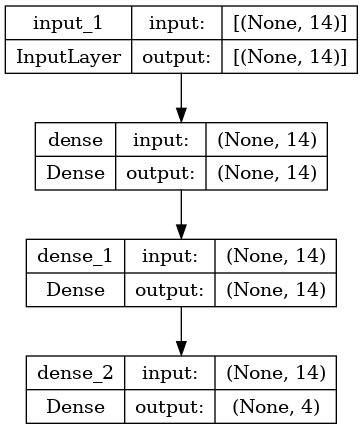

In [15]:
#show model architecture
plot_model(model,show_shapes=True)

<Axes: title={'center': 'Accuracy curve'}>

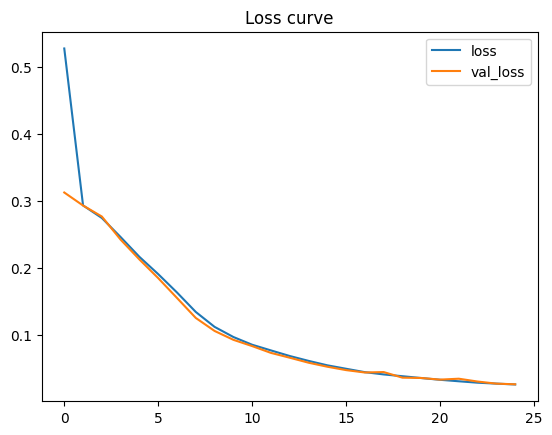

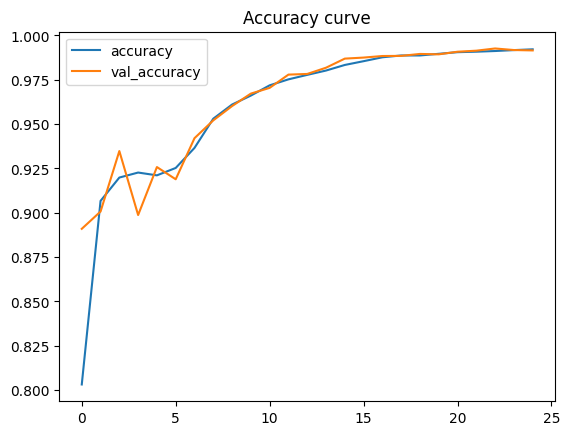

In [16]:
#checking model training loss history
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

#checking model training accuracy history
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')

# Evaluating the model

In [27]:
#Evaluating using model.evaluate
loss,acc = model.evaluate(X_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")

427/427 [==============================] - 1s 1ms/step - loss: 0.0270 - accuracy: 0.9915
Model loss: 0.027
Model accuracy: 99.15%


In [18]:
#set random seed
tf.random.set_seed(42)

y_probs = model.predict(X_test)
y_preds = tf.argmax(y_probs,axis=1)

427/427 [==============================] - 1s 1ms/step


In [26]:
#Making Classification report + accuracy
acc_score=accuracy_score(y_test,y_preds)

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       598
           1       0.99      0.99      0.99      7924
           2       0.99      0.99      0.99      3225
           3       1.00      0.99      1.00      1894

    accuracy                           0.99     13641
   macro avg       0.99      0.98      0.99     13641
weighted avg       0.99      0.99      0.99     13641

Accuracy is 99.15%


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

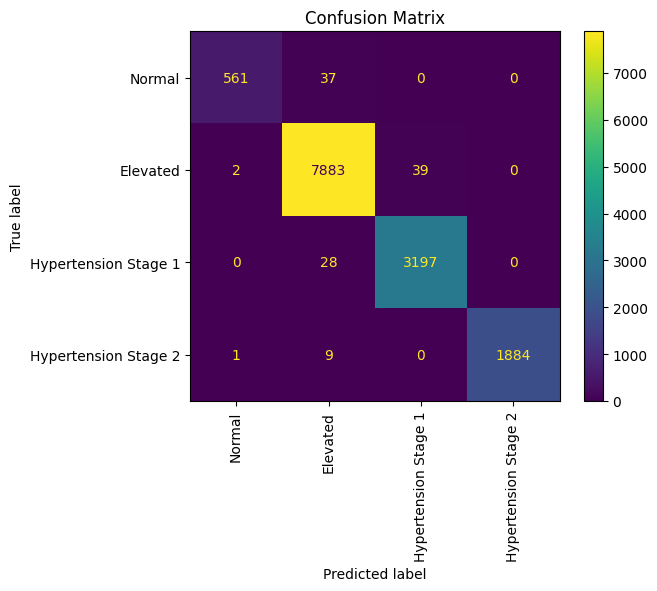

In [20]:
#Making Confusion Matrix
cm = confusion_matrix(y_test,y_preds)

#using ConfusionMatrixDisplay to output a good confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Correlation between features')

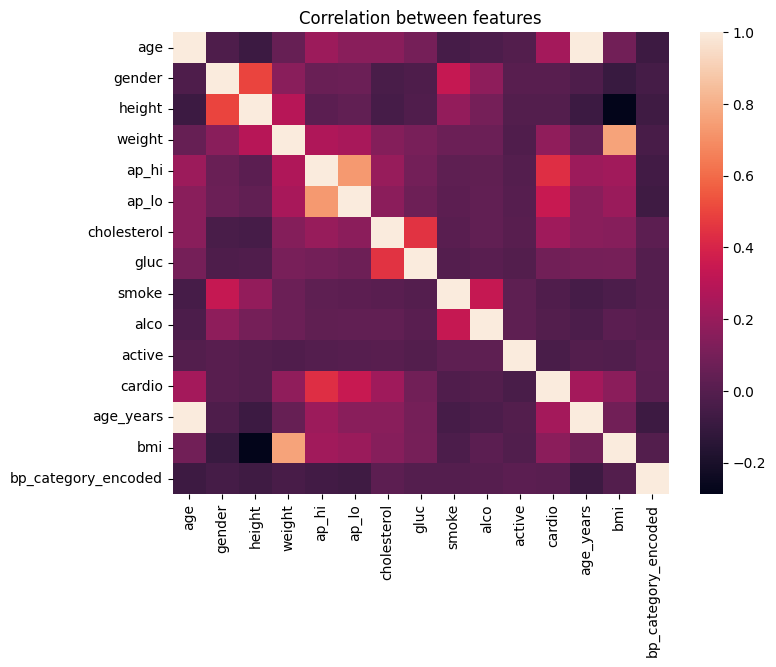

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.title('Correlation between features')

Text(0.5, 1.0, "Features' correlation to the label")

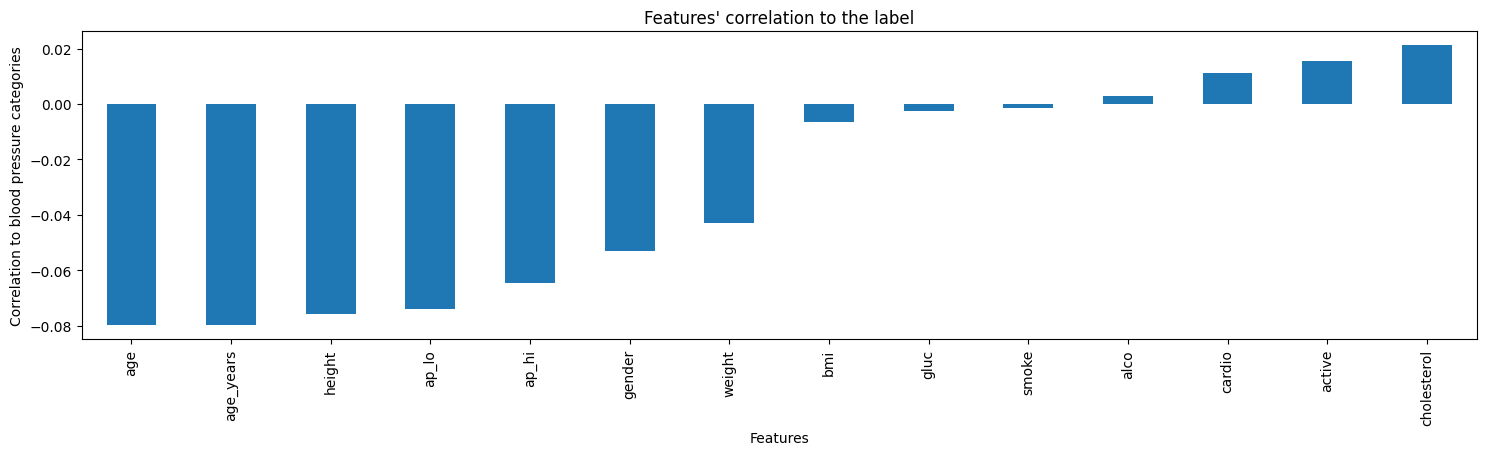

In [22]:
plt.figure(figsize=(18,4))
df.corr()['bp_category_encoded'][:-1].sort_values(ascending = True).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation to blood pressure categories')
plt.title('Features\' correlation to the label')

# Conclusion

- This notebook performed simple EDA on the cardiovascular-disease dataset, produced a Neural Network with blood pressure category classification **99%** accuracy (**99%** validation accuracy) and **99%** precision.
- Cholesterol level had the most influence on the classification results with the highest positive correlation of 0.02 whilst age had the highest negative correlation of 0.08